# The landscape of maching learning algorithms

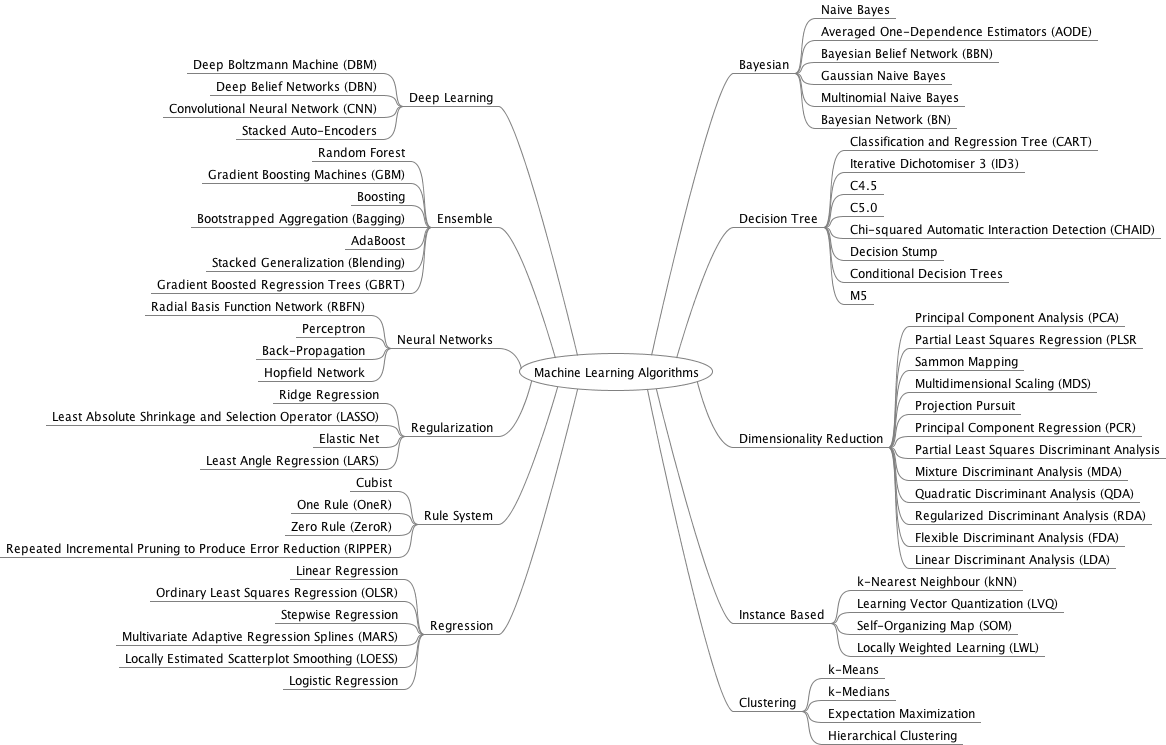

In [1]:
from IPython.display import Image
Image(filename='map.png')
# https://www.analyticsvidhya.com/blog/2015/09/build-predictive-model-10-minutes-python/
# http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

# Data Analysis and Predictions

1. Descriptive analysis on the Data – 50% time
2. Data treatment (Missing value and outlier fixing) – 40% time
3. Data Modelling – 4% time
4. Estimation of performance – 6% time


Let’s go through the process step by step (with estimates of time spent in each step):


## Stage 1: Descriptive Analysis / Data Exploration:

In my initial days as data scientist, data exploration used to take a lot of time for me. With time, I have automated a lot of operations on the data. Given that data prep takes up 50% of the work in building a first model, the benefits of automation are obvious. 

With advanced machine learning tools coming in race, time taken to perform this task has been significantly reduced. Since this is our first benchmark model, we do away with any kind of feature engineering. Hence, the time you might need to do descriptive analysis is restricted to know missing values and big features which are directly visible. In my methodology, you will need 2 minutes to complete this step (Assumption, 100,000 observations in data set).

The operations I perform for my first model include:

Identify ID, Input and Target features
Identify categorical and numerical features
Identify columns with missing values

### Step 1 : Import required libraries and read test and train data set. Append both.

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [38]:
train=pd.read_csv('titanic_data/train.csv')
test=pd.read_csv('titanic_data/test.csv')
train['Type']='Train' #Create a flag for Train and Test Data set
test['Type']='Test'
fullData = pd.concat([train,test],axis=0) #Combined both Train and Test Data set

In [45]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Train
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Train
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Train
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Train
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Train


## Stage 2: Data Treatment (Missing values treatment):

There are various ways to deal with it. For our first model, we will focus on the smart and quick techniques to build your first effective model (These are already discussed by Tavish in his article, I am adding a few methods)

Create dummy flags for missing value(s) : It works, sometimes missing values itself carry a good amount of information.
Impute missing value with mean/ median/ any other easiest method : Mean and Median imputation performs well, mostly people prefer to impute with mean value but in case of skewed distribution I would suggest you to go with median. Other Intelligent methods are imputing values by similar case mean and median imputation using other relevant features or building a model. For Example: In Titanic survival challenge, you can impute missing values of Age using salutation of passengers name Like “Mr.”, “Miss.”,”Mrs.”,”Master” and others and this has shown good impact on model performance.
Impute missing value of categorical variable: Create a new level to impute categorical variable so that all missing value is coded as a single value say “New_Cat” or you can look at the frequency mix and impute the missing value with value having higher frequency.
With such simple methods of data treatment, you can reduce the time to treat data to 3-4 minutes.



### Step 2: View the column names / summary of the dataset

In [44]:
fullData.columns # This will show all the column names
fullData.describe() #You can look at summary of numerical fields by using describe() function
fullData.head(10) # Show first 10 records of dataframe


/Users/narine/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Train
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Train
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Train
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Train
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Train
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Train


### Step 4: Identify the a) ID variables b)  Target variables c) Categorical Variables d) Numerical Variables e) Other Variables

In [46]:
ID_col = ['PassengerId','Name']
target_col = ["Survived"]
cat_cols = ['Cabin','Embarked','Sex','Ticket']
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(ID_col)-set(target_col))
#other_col=['Type'] #Test and Train Data set identifier

### Step 5 : Identify the variables with missing values and create a flag for those

In [47]:
fullData.isnull().any()#Will return the feature with True or False,True means have missing value else False

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
Type           False
dtype: bool

In [48]:
num_cat_cols = num_cols+cat_cols # Combined numerical and Categorical variables

# Create a new variable for each variable having missing value with VariableName_NA 
# and flag missing value with 1 and other with 0

for var in num_cat_cols:
    if fullData[var].isnull().any()==True:
        fullData[var+'_NA']=fullData[var].isnull()*1 



### Step 6 : Impute Missing values

In [52]:
pd.options.mode.chained_assignment = None  # default='warn'

In [54]:
#Impute numerical missing values with mean
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean(),inplace=True)

In [55]:
#Impute categorical missing values with -9999
fullData[cat_cols] = fullData[cat_cols].fillna(value = -9999)


### Step 7 : Create a label encoders for categorical variables and split the data set to train & test, further split the train data set to Train and Validate

In [60]:
#create label encoders for categorical features
for var in cat_cols:
 number = LabelEncoder()
 fullData[var] = number.fit_transform(fullData[var].astype('str'))

#Target variable is also a categorical so convert it
fullData["Survived"] = number.fit_transform(fullData["Survived"].astype('str'))

train=fullData[fullData['Type']=='Train']
test=fullData[fullData['Type']=='Test']

train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train, Validate = train[train['is_train']==True], train[train['is_train']==False]

## Stage 3. Data Modelling:

I recommend to use any one of GBM / Random Forest techniques, depending on the business problem. These two techniques are extremely effective to create a benchmark solution. I have seen data scientist are using these two methods often as their first model and in some cases it acts as a final model also. This will take maximum amount of time (~4-5 minutes).


### Step 8 : Pass the imputed and dummy (missing values flags) variables into the modelling process. I am using random forest to predict the class

In [64]:
features=list(set(list(fullData.columns))-set(ID_col)-set(target_col)-set(other_col))

In [65]:
x_train = Train[list(features)].values
y_train = Train["Survived"].values
x_validate = Validate[list(features)].values
y_validate = Validate["Survived"].values
x_test=test[list(features)].values


In [68]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

## Stage 4. Estimation of Performance:

There are various methods to validate your model performance, I would suggest you to divide your train data set into Train and validate (ideally 70:30) and build model based on 70% of train data set. Now, cross-validate it using 30% of validate data set and evaluate the performance using evaluation metric. This finally takes 1-2 minutes to execute and document.

Intent of this article is not to win the competition, but to establish a benchmark for our self. Let’s look at the python codes to perform above steps and build your first model with higher impact.

### Step 9 : Check performance and make predictions

In [69]:
status = rf.predict_proba(x_validate)

In [71]:
fpr, tpr, _ = roc_curve(y_validate, status[:,1])

In [74]:
status = rf.predict_proba(x_validate)
fpr, tpr, _ = roc_curve(y_validate, status[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

final_status = rf.predict_proba(x_test)
test["Survived"]=final_status[:,1]
test.to_csv('titanic_data/model_output.csv',columns=['Name','Survived'])

0.863911290323


### Step 10: Visualize the performance

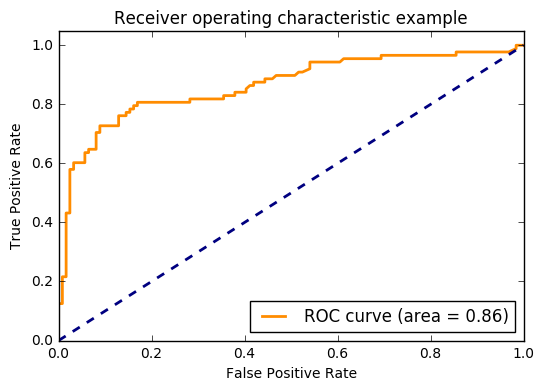

In [75]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Step 11: Try other machine learning algorithms like gradient boosting regression
https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/

In [95]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)
mse = mean_squared_error(y_validate, clf.predict(x_validate))
print("MSE: %.4f" % mse)

status = clf.predict(x_validate)
fpr, tpr, _ = roc_curve(y_validate, status)
roc_auc = auc(fpr, tpr)
print(roc_auc)

final_status = rf.predict_proba(x_test)
test["Survived"]=final_status[:,1]
test.to_csv('titanic_data/model_output.csv',columns=['Name','Survived'])

MSE: 0.1085
0.899425287356
